In [236]:
import pandas as pd 
import numpy as np 

In [237]:
customer = pd.read_csv('customer.csv')

In [238]:
customer.head()

,customerid,DOB,gender,address,Website,job,industry
0,0000000014,36268,Nữ,hoa khe quan thanh khe,KH0104|0345,student,computer
1,0000000034,35901,Nam,man thai,KH0104|0333,student,health service
2,0000000051,34319,Nam,que son quang nam,KH0104|0255,blue collar,economics
3,0000000081,36472,Nam,truong chinh,KH0104|0293,student,economics
4,0000000098,34608,Nam,cẩm lệ,KH0104|40580,blue collar,health service


In [239]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4479 entries, 0 to 4478
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerid  4479 non-null   object
 1   DOB         4479 non-null   int64 
 2   gender      4479 non-null   object
 3   address     4478 non-null   object
 4   Website     3943 non-null   object
 5   job         4479 non-null   object
 6   industry    3357 non-null   object
dtypes: int64(1), object(6)
memory usage: 245.1+ KB


In [240]:
from datetime import datetime, timedelta

In [241]:
current_date = datetime.now()
base_date = datetime(1899, 12, 30)
max_days_difference = (current_date - base_date).days

In [242]:
rows_to_drop = customer[customer['DOB']>max_days_difference].index

In [243]:
customer.drop(rows_to_drop, axis=0, inplace=True)

In [244]:
def date_convert(excel_date_value):
    base_date = datetime(1899, 12, 30)
    resulting_date = base_date + timedelta(days=excel_date_value)
    formatted_date = resulting_date.strftime('%d/%m/%Y')
    return formatted_date

customer['DOB'] = customer['DOB'].apply(date_convert)

In [245]:
customer['DOB'] = pd.to_datetime(customer['DOB'], format='%d/%m/%Y')

In [246]:
def age_calculate(birthdate):
    current_date = datetime.now()
    age = current_date.year - birthdate.year - ((current_date.month, current_date.day) < (birthdate.month, birthdate.day))
    return age 

customer['age'] = customer['DOB'].apply(age_calculate)

In [247]:
customer['age']

0       24
1       25
2       30
3       24
4       29
        ..
4474    28
4475    23
4476    35
4477    27
4478    21
Name: age, Length: 4475, dtype: int64

In [248]:
customer

,customerid,DOB,gender,address,Website,job,industry,age
0,0000000014,1999-04-18,Nữ,hoa khe quan thanh khe,KH0104|0345,student,computer,24
1,0000000034,1998-04-16,Nam,man thai,KH0104|0333,student,health service,25
2,0000000051,1993-12-16,Nam,que son quang nam,KH0104|0255,blue collar,economics,30
3,0000000081,1999-11-08,Nam,truong chinh,KH0104|0293,student,economics,24
4,0000000098,1994-10-01,Nam,cẩm lệ,KH0104|40580,blue collar,health service,29
...,...,...,...,...,...,...,...,...
4474,KH9855766,1995-07-05,Nữ,"A, THUAN PHUOC,HAI CHAU, DA NANG",NaN,specialist,finance,28
4475,KH9958204,2001-01-01,Nữ,"Phước Mỹ, ĐN",NaN,teenager,NaN,23
4476,WEBS00000043900,1988-06-17,Nữ,nguyen gian thanh,KHWEBS|00006890,specialist,construction,35
4477,WEBS00000044909,1996-09-08,Nữ,ngũ hành sơn,KHWEBS|00007899,blue collar,finance,27


In [249]:
customer.nunique()

customerid    4475
DOB           3049
gender           2
address       1260
Website       3940
job              5
industry         9
age             50
dtype: int64

In [250]:
customer['gender'] = customer['gender'].astype('category')

In [251]:
customer['address'].value_counts()

address
hải châu                     312
ngũ hành sơn                 294
hòa khánh                    270
liên chiểu                   263
sơn trà                      252
                            ... 
vũ quỳnh                       1
Pleiku, Gia Lai                1
Phan Boi                       1
 THÁI THỊ BÔI ĐÀ NẴNG          1
Thanh Khê Tây - Thanh Khê      1
Name: count, Length: 1260, dtype: int64

In [252]:
customer.isnull().sum()

customerid       0
DOB              0
gender           0
address          1
Website        535
job              0
industry      1118
age              0
dtype: int64

In [253]:
null_address_rows = customer[customer['address'].isnull()].index

In [254]:
customer.drop(null_address_rows, axis=0, inplace=True)

In [255]:

customer['address']

0                 hoa khe quan thanh khe
1                               man thai
2                      que son quang nam
3                           truong chinh
4                                 cẩm lệ
                      ...               
4474    A, THUAN PHUOC,HAI CHAU, DA NANG
4475                        Phước Mỹ, ĐN
4476                   nguyen gian thanh
4477                        ngũ hành sơn
4478           Thanh Khê Tây - Thanh Khê
Name: address, Length: 4474, dtype: object

In [256]:
# import itertools
# from thefuzz import fuzz, process
# customer_address_id = customer[['customerid', 'address']]
# customer_address_id

In [257]:
# customer_address = customer["address"].apply(lambda x: x.lower())
# customer_address.value_counts()


In [258]:
# compare_address = pd.DataFrame(itertools.product(customer['customerid'], customer['customerid']), columns=['CSV 1', 'CSV 2'])
# compare_address

In [259]:
# compare_address = compare_address.merge(customer_address_id, how='right', left_on='CSV 1', right_on='customerid')
# compare_address = compare_address.merge(customer_address_id, how='right', left_on='CSV 2', right_on='customerid')
# compare_address

In [260]:
# compare_address = compare_address[['CSV 1', 'CSV 2', 'address_x', 'address_y']]
# compare_address

In [261]:
# partial_ratio_score = [fuzz.partial_ratio(c1, c2) for c1, c2 in compare_address[['address_x', 'address_y']].values]

In [262]:
# compare_address['Partial_ratio_score'] = partial_ratio_score
# compare_address

In [263]:
# compare_address = compare_address[compare_address['Partial_ratio_score'] >= 90]
# compare_address = compare_address[compare_address['CSV 1'] != compare_address['CSV 2']]
# compare_address

In [264]:
# compare_address.loc[compare_address['CSV 1']=='0001079961']

In [265]:
# compare_address

In [266]:
# compare_address[compare_address['Partial_ratio_score'] >= 80]

In [267]:
customer[customer['address'].apply(lambda x: len([part.strip() for part in x.replace(',', ' ').split()])==2)]['address'].unique()

array(['man thai', ' truong chinh', 'cẩm lệ', 'Tam Thuan', ' Le Duan',
       'Thuan Phuoc', 'liên chiểu', 'hòa vang', 'Ton Dan', ' thanh sơn',
       'hòa minh', 'sơn trà', 'THANH KHÊ', ' ton dan', 'hải châu',
       'Hùng Vương', 'hòa khánh', 'ĐỐNG ĐA', 'Mẹ Nhu', 'Nguyễn Chánh',
       ' Đống Đa', 'Văn Cao', 'lê duẩn', 'LIÊN CHIỂU', ' Lê Duẩn',
       'Phan Thanh', 'cam le', 'Lang Ha', 'tô hiệu', 'hỉa phòng',
       'Yên Khê', 'KHU đÔNG', 'đồng kì', 'Quảng Trị', 'Lê Thiệt',
       'LÊ DUẨN', 'hoaf vang', ' hùng vương', 'KHUÊ TRUNG', 'hoàng diệu',
       ' LÊ ĐỘ', 'tôn đản', 'quảng nam', 'bùi viện', 'TRƯỜNG CHINH',
       'quế sơn', 'Hoàng Diệu', ' Nguyễn Trãi', 'Đào Tần', 'Liên Chiểu',
       'Tôn Đản', 'lý triệu', 'Trần Phú', 'LÊ ĐỘ', 'Hàm Nghi', 'Hải Châu',
       'NGỌC HÂN', 'Quảng Nam', 'bac dau', 'tân thái', 'hải phòng',
       'Thanh thủy', 'Hải Phòng', 'Mân Quang', 'Huỳnh Lý', 'Hải Sơn',
       'Đỗ Quang', 'thanh Long', 'Thanh Thủy', 'KỲ ĐỒNG', 'HÙNG VƯƠNG',
       'cô giang',

In [268]:
from unidecode import unidecode

customer['address']=customer['address'].apply(unidecode).str.lower()
customer['address']=customer['address'].apply(lambda x: x.split('-')[-2] if '-' in x else x.split(',')[-2] if ',' in x else x)

In [269]:
customer['district'] = np.NaN
customer['city'] = np.NaN
customer['partial score'] = 0
customer

,customerid,DOB,gender,address,Website,job,industry,age,district,city,partial score
0,0000000014,1999-04-18,Nữ,hoa khe quan thanh khe,KH0104|0345,student,computer,24,NaN,NaN,0
1,0000000034,1998-04-16,Nam,man thai,KH0104|0333,student,health service,25,NaN,NaN,0
2,0000000051,1993-12-16,Nam,que son quang nam,KH0104|0255,blue collar,economics,30,NaN,NaN,0
3,0000000081,1999-11-08,Nam,truong chinh,KH0104|0293,student,economics,24,NaN,NaN,0
4,0000000098,1994-10-01,Nam,cam le,KH0104|40580,blue collar,health service,29,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
4474,KH9855766,1995-07-05,Nữ,hai chau,NaN,specialist,finance,28,NaN,NaN,0
4475,KH9958204,2001-01-01,Nữ,phuoc my,NaN,teenager,NaN,23,NaN,NaN,0
4476,WEBS00000043900,1988-06-17,Nữ,nguyen gian thanh,KHWEBS|00006890,specialist,construction,35,NaN,NaN,0
4477,WEBS00000044909,1996-09-08,Nữ,ngu hanh son,KHWEBS|00007899,blue collar,finance,27,NaN,NaN,0


In [270]:
customer.loc[customer['address']=='que son quang nam', 'partial score'].iloc[0]

0

In [271]:
from district_extract import district_list
from thefuzz import process

district_list = list(map(unidecode, district_list))
district_list = list(map(str.lower, district_list))

unique_address = customer['address'].unique()
for district in district_list:
    matches=process.extract(district, unique_address, limit=len(unique_address))
    for match in matches:
        if match[1]>=88:
            if match[1]>customer.loc[customer['address']==match[0], 'partial score'].iloc[0]: 
                customer.loc[customer['address']==match[0], 'district']=district
                customer.loc[customer['address']==match[0], 'partial score']=match[1]

C:\Users\Kien\AppData\Local\Temp\ipykernel_6536\3145188159.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'quan ba dinh' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  customer.loc[customer['address']==match[0], 'district']=district


In [272]:
from district_extract import district_dict
print(district_dict)

{'quan ba dinh': 'Hà Nội', 'quan hoan kiem': 'Hà Nội', 'quan tay ho': 'Hà Nội', 'quan long bien': 'Hà Nội', 'quan cau giay': 'Hà Nội', 'quan dong da': 'Hà Nội', 'quan hai ba trung': 'Hà Nội', 'quan hoang mai': 'Hà Nội', 'quan thanh xuan': 'Hà Nội', 'huyen soc son': 'Hà Nội', 'huyen dong anh': 'Hà Nội', 'huyen gia lam': 'Hà Nội', 'quan nam tu liem': 'Hà Nội', 'huyen thanh tri': 'Sóc Trăng', 'quan bac tu liem': 'Hà Nội', 'huyen me linh': 'Hà Nội', 'quan ha dong': 'Hà Nội', 'thi xa son tay': 'Hà Nội', 'huyen ba vi': 'Hà Nội', 'huyen phuc tho': 'Hà Nội', 'huyen dan phuong': 'Hà Nội', 'huyen hoai duc': 'Hà Nội', 'huyen quoc oai': 'Hà Nội', 'huyen thach that': 'Hà Nội', 'huyen chuong my': 'Hà Nội', 'huyen thanh oai': 'Hà Nội', 'huyen thuong tin': 'Hà Nội', 'huyen phu xuyen': 'Hà Nội', 'huyen ung hoa': 'Hà Nội', 'huyen my duc': 'Hà Nội', 'thanh pho ha giang': 'Hà Giang', 'huyen dong van': 'Hà Giang', 'huyen meo vac': 'Hà Giang', 'huyen yen minh': 'Hà Giang', 'huyen quan ba': 'Hà Giang', 'huye

In [273]:
customer['city'] = customer['district'].apply(lambda x: district_dict.get(x, np.NaN))

In [274]:
customer.head(100)

,customerid,DOB,gender,address,Website,job,industry,age,district,city,partial score
0,0000000014,1999-04-18,Nữ,hoa khe quan thanh khe,KH0104|0345,student,computer,24,quan thanh khe,Đà Nẵng,90
1,0000000034,1998-04-16,Nam,man thai,KH0104|0333,student,health service,25,NaN,NaN,0
2,0000000051,1993-12-16,Nam,que son quang nam,KH0104|0255,blue collar,economics,30,NaN,NaN,0
3,0000000081,1999-11-08,Nam,truong chinh,KH0104|0293,student,economics,24,NaN,NaN,0
4,0000000098,1994-10-01,Nam,cam le,KH0104|40580,blue collar,health service,29,quan cam le,Đà Nẵng,90
...,...,...,...,...,...,...,...,...,...,...,...
95,0000010136,1992-12-11,Nam,hai chau,KH0104|18536,specialist,health service,31,quan hai chau,Đà Nẵng,90
96,0000010165,1994-02-17,Nữ,lien chieu,KH0104|18442,specialist,construction,29,quan lien chieu,Đà Nẵng,90
97,0000010196,1993-03-30,Nữ,hai phong da nang,KH0104|18241,blue collar,health service,30,NaN,NaN,0
98,0000010231,1996-02-03,Nam,son tra,KH0104|16066,blue collar,finance,27,quan son tra,Đà Nẵng,90


In [275]:
customer['district'].isna().sum()

1454

In [276]:
index = []
for address in unique_address:
    if ',' in address or '-' in address:
        index.append(list(customer[customer['address']==address].index)[0])

In [277]:
customer[customer.index.isin(index)]

,customerid,DOB,gender,address,Website,job,industry,age,district,city,partial score


In [278]:
customer[customer.index.isin(index)]

,customerid,DOB,gender,address,Website,job,industry,age,district,city,partial score


In [279]:
from district_extract import city_map, avenues_list


unique_address = customer[customer['city'].isna()]['address'].unique()
for avenue in avenues_list:
    matches=process.extract(avenue, unique_address, limit=len(unique_address))
    for match in matches:
        if match[1]>=85:
            if match[1]>customer.loc[customer['address']==match[0], 'partial score'].iloc[0]: 
                customer.loc[customer['address']==match[0], 'city']='Đà Nẵng'
                customer.loc[customer['address']==match[0], 'partial score']=match[1]

unique_address = customer[customer['city'].isna()]['address'].unique()
for city in city_map:
    matches=process.extract(city, unique_address, limit=len(unique_address))
    for match in matches:
        if match[1]>=90:
            if match[1]>customer.loc[customer['address']==match[0], 'partial score'].iloc[0]: 
                customer.loc[customer['address']==match[0], 'city']=city_map[city]
                customer.loc[customer['address']==match[0], 'partial score']=match[1]

In [280]:
customer['city'].isna().sum()

143

In [281]:
customer[np.logical_and(~customer['city'].isna(), customer['district'].isna())]

,customerid,DOB,gender,address,Website,job,industry,age,district,city,partial score
1,0000000034,1998-04-16,Nam,man thai,KH0104|0333,student,health service,25,NaN,Đà Nẵng,90
2,0000000051,1993-12-16,Nam,que son quang nam,KH0104|0255,blue collar,economics,30,NaN,Đà Nẵng,86
3,0000000081,1999-11-08,Nam,truong chinh,KH0104|0293,student,economics,24,NaN,Đà Nẵng,90
5,0000000109,1999-05-05,Nam,tam thuan,KH0104|0191,student,education,24,NaN,Đà Nẵng,90
8,0000000229,1992-01-14,Nam,le dinh duong,KH0104|2716,white collar,economics,32,NaN,Đà Nẵng,95
...,...,...,...,...,...,...,...,...,...,...,...
4461,KH9617828,1993-12-27,Nữ,hoang van thai,NaN,blue collar,education,30,NaN,Đà Nẵng,95
4466,KH9704978,1997-05-18,Nữ,hoang van thai,NaN,student,construction,26,NaN,Đà Nẵng,95
4469,KH978498,1999-08-09,Nữ,dien loc,NaN,student,government agent,24,NaN,Đà Nẵng,86
4475,KH9958204,2001-01-01,Nữ,phuoc my,NaN,teenager,NaN,23,NaN,Đà Nẵng,90


In [282]:
customer['city'].value_counts()

city
Đà Nẵng           4109
Quảng Nam           67
Long An             25
Điện Biên           24
Quảng Trị           14
Hà Nội              13
Hà Giang            11
Phú Thọ              9
Quảng Ngãi           7
Hải Phòng            5
Thừa Thiên-Huế       5
Hà Tĩnh              5
Đắk Lắk              4
Cao Bằng             3
Gia Lai              3
Nghệ An              3
Kon Tum              3
Thanh Hóa            2
Lạng Sơn             2
Quảng Bình           2
Kiên Giang           2
Bắc Giang            1
Cần Thơ              1
Tây Ninh             1
Hưng Yên             1
Đồng Nai             1
Hồ Chí Minh          1
Thái Bình            1
Bình Dương           1
Hải Dương            1
Sơn La               1
Quảng Ninh           1
Khánh Hòa            1
Ninh Bình            1
Name: count, dtype: int64

In [283]:
customer

,customerid,DOB,gender,address,Website,job,industry,age,district,city,partial score
0,0000000014,1999-04-18,Nữ,hoa khe quan thanh khe,KH0104|0345,student,computer,24,quan thanh khe,Đà Nẵng,90
1,0000000034,1998-04-16,Nam,man thai,KH0104|0333,student,health service,25,NaN,Đà Nẵng,90
2,0000000051,1993-12-16,Nam,que son quang nam,KH0104|0255,blue collar,economics,30,NaN,Đà Nẵng,86
3,0000000081,1999-11-08,Nam,truong chinh,KH0104|0293,student,economics,24,NaN,Đà Nẵng,90
4,0000000098,1994-10-01,Nam,cam le,KH0104|40580,blue collar,health service,29,quan cam le,Đà Nẵng,90
...,...,...,...,...,...,...,...,...,...,...,...
4474,KH9855766,1995-07-05,Nữ,hai chau,NaN,specialist,finance,28,quan hai chau,Đà Nẵng,90
4475,KH9958204,2001-01-01,Nữ,phuoc my,NaN,teenager,NaN,23,NaN,Đà Nẵng,90
4476,WEBS00000043900,1988-06-17,Nữ,nguyen gian thanh,KHWEBS|00006890,specialist,construction,35,huyen giang thanh,Kiên Giang,88
4477,WEBS00000044909,1996-09-08,Nữ,ngu hanh son,KHWEBS|00007899,blue collar,finance,27,quan ngu hanh son,Đà Nẵng,95


In [284]:
customer_id_age = customer[['customerid', 'age']]
customer_id_age.info()
customer_id_age.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 4474 entries, 0 to 4478
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerid  4474 non-null   object
 1   age         4474 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 104.9+ KB


,age
count,4474.000000
mean,26.907465
std,5.442291
min,3.000000
25%,24.000000
50%,26.000000
75%,29.000000
max,59.000000


In [285]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
np.array(customer_id_age.value_counts('age'))


array([469, 414, 408, 398, 361, 351, 304, 244, 226, 212, 183, 153, 136,
       105,  76,  55,  43,  37,  36,  31,  28,  26,  21,  18,  15,  15,
        13,  13,  11,   9,   7,   6,   6,   5,   5,   5,   4,   4,   4,
         3,   2,   2,   2,   2,   1,   1,   1,   1,   1,   1], dtype=int64)

26.90746535538668
26.0


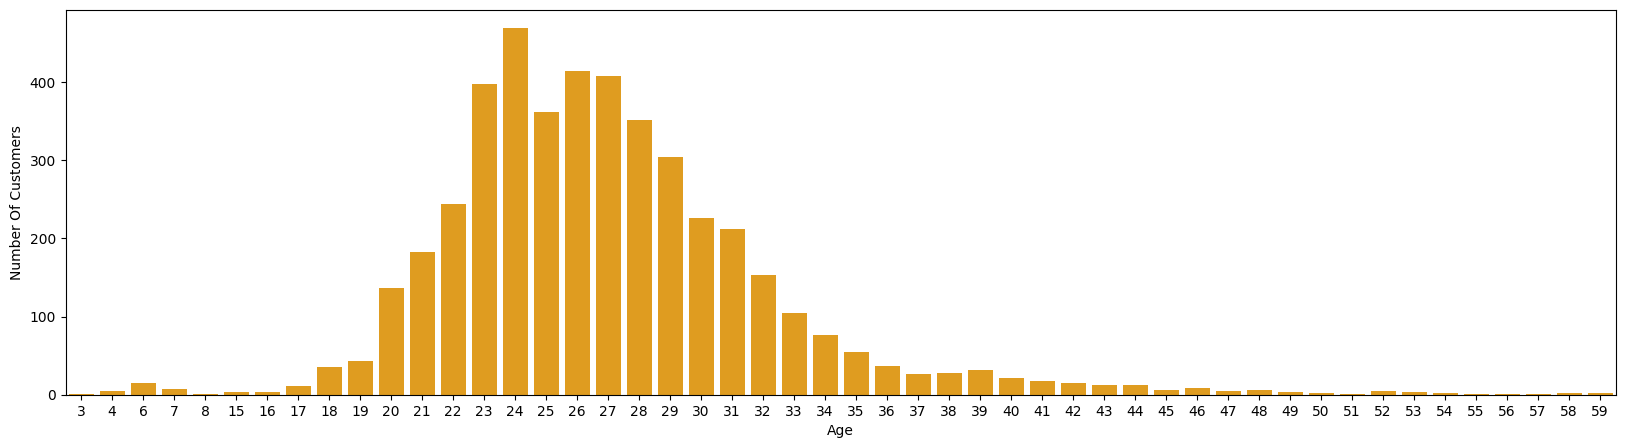

In [286]:
plt.figure(figsize=(20, 5))
sns.set_palette('RdBu')
by_age = sns.countplot(x='age', data=customer_id_age, color='orange')
by_age.set_xlabel('Age')
by_age.set_ylabel('Number Of Customers')
print(np.mean(np.array(customer_id_age['age']))) #trung binh
print(np.median(np.array(customer_id_age['age']))) #trung vi

In [287]:
customer_id_industry = customer[['customerid', 'industry']]
print(customer_id_industry)
customer_id_industry.info()

           customerid        industry
0          0000000014        computer
1          0000000034  health service
2          0000000051       economics
3          0000000081       economics
4          0000000098  health service
...               ...             ...
4474        KH9855766         finance
4475        KH9958204             NaN
4476  WEBS00000043900    construction
4477  WEBS00000044909         finance
4478  WEBS00000046015             NaN

[4474 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 4474 entries, 0 to 4478
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerid  4474 non-null   object
 1   industry    3356 non-null   object
dtypes: object(2)
memory usage: 104.9+ KB


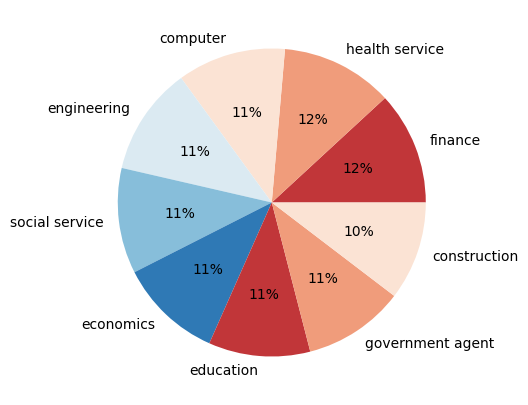

In [288]:
plt.figure(figsize=(20, 5))
palette_color = sns.color_palette('RdBu')
data = np.array(customer_id_industry['industry'].value_counts())
plt.pie(data, labels=customer_id_industry['industry'].value_counts().index, autopct="%.0f%%")
plt.show()

In [289]:
customer_id_district = customer[['customerid', 'district']]
# customer_id_district.info()
customer_id_district.dropna(subset=['district'], inplace=True)


C:\Users\Kien\AppData\Local\Temp\ipykernel_6536\603347766.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_id_district.dropna(subset=['district'], inplace=True)


In [290]:
count_district = customer_id_district.value_counts('district')
count_district = pd.DataFrame(count_district)
count_district = count_district[count_district['count'] >= 20]

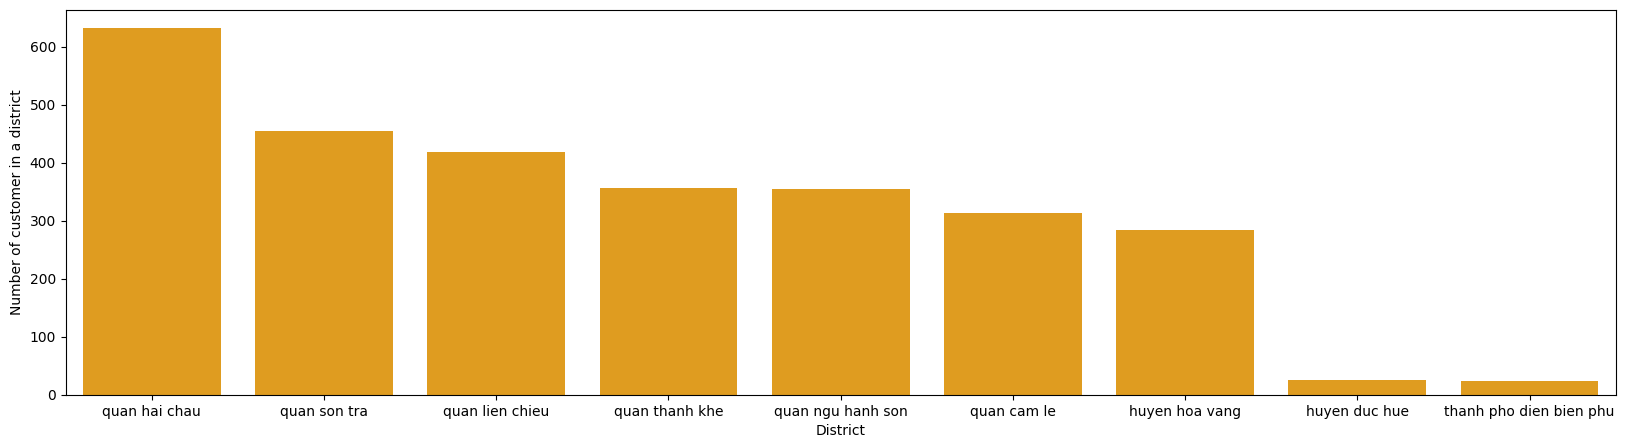

In [291]:
plt.figure(figsize=(20, 5))
by_district = sns.barplot(x='district', y='count', data=count_district, color='orange')
by_district.set_xlabel('District')
by_district.set_ylabel('Number of customer in a district')
plt.show()